## Importing Necessary Liberaris and Setting Path to dataset

In [101]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16  # For Task #3
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score

# Paths to your data directories
train_dir =  r'C:\Users\Ali Computers\Desktop\Machine-Learning-\Weather-Classification\weather classification\train'
val_dir =  r'C:\Users\Ali Computers\Desktop\Machine-Learning-\Weather-Classification\weather classification\validation'
test_dir =  r'C:\Users\Ali Computers\Desktop\Machine-Learning-\Weather-Classification\weather classification\test'

# Define image size and batch size
img_size = (128, 128)
batch_size = 32
num_classes = 4 


## Confirming Paths and checking image sizes

In [103]:
import os

image_path = r'C:\Users\Ali Computers\Desktop\Machine-Learning-\Weather-Classification\weather classification\train\cloudy\cloudy10.jpg'
print("File exists:", os.path.exists(image_path))


File exists: True


In [104]:
from PIL import Image

# Load the image
image_path = r'C:\Users\Ali Computers\Desktop\Machine-Learning-\Weather-Classification\weather classification\train\cloudy\cloudy12.jpg'
image = Image.open(image_path)

# Get image size
imageSize = image.size
imageSize


(300, 168)

In [105]:
from PIL import Image

# Load the image
image_path = r'C:\Users\Ali Computers\Desktop\Machine-Learning-\Weather-Classification\weather classification\train\cloudy\cloudy13.jpg'
image = Image.open(image_path)

# Get image size
imageSize = image.size
imageSize

(306, 165)

## Rescaling Images 

In [107]:
# Initialize ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1.0/255)
val_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load images with flow_from_directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # No shuffling for accurate evaluation
)


Found 400 images belonging to 4 classes.
Found 200 images belonging to 4 classes.
Found 525 images belonging to 4 classes.


## Checking Scaled Image

In [123]:
# Get one batch of images and labels from the train generator
images, labels = next(train_generator)

# Print the range of pixel values in the first image of the batch
print("Pixel value range After scaling:", images[1].min(), "to", images[1].max())


Pixel value range After scaling: 0.0 to 1.0


## Define the CNN Model 

In [126]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\Ali Computers\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Train the Model

In [129]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)


Epoch 1/10


C:\Users\Ali Computers\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.3678 - loss: 1.2247 - val_accuracy: 0.6500 - val_loss: 0.8845
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 538ms/step - accuracy: 0.7390 - loss: 0.6688 - val_accuracy: 0.8000 - val_loss: 0.5775
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 636ms/step - accuracy: 0.7912 - loss: 0.5371 - val_accuracy: 0.7900 - val_loss: 0.5706
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 601ms/step - accuracy: 0.8326 - loss: 0.4174 - val_accuracy: 0.7850 - val_loss: 0.6551
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 719ms/step - accuracy: 0.8754 - loss: 0.3292 - val_accuracy: 0.8000 - val_loss: 0.6825
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 702ms/step - accuracy: 0.9034 - loss: 0.2816 - val_accuracy: 0.7900 - val_loss: 0.8165
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 657ms/step - accuracy: 0.9108 - loss: 0.2747 - val_accuracy: 0.8100 - val_loss: 0.5526
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 720ms/step - accuracy: 0.9065 - loss: 0.2293 - val_accuracy: 0.8300 -

## Accuracy on test dataset

In [131]:
# Test accuracy
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy (Task #1): {test_accuracy * 100:.2f}%")


17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 557ms/step - accuracy: 0.8690 - loss: 0.5480
Test accuracy (Task #1): 90.10%


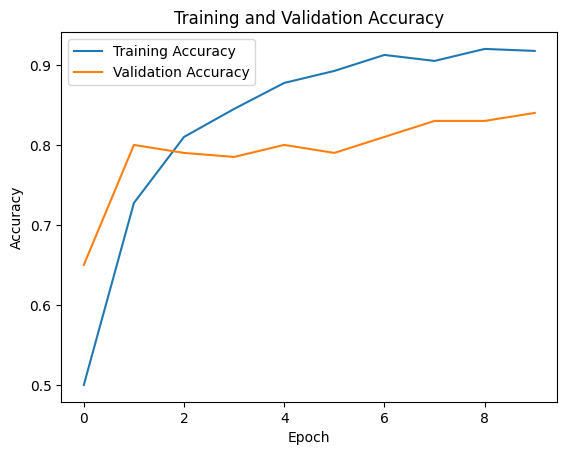

In [136]:
# Plotting accuracy and loss curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Augment Data and Retrain 

In [143]:
# Augmented data generator
train_datagen_aug = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Apply augmentation
train_generator_aug = train_datagen_aug.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Train the model with augmentation
history_aug = model.fit(
    train_generator_aug,
    epochs=20,
    validation_data=val_generator
)

# Evaluate the model on the test set after augmentation
test_loss_aug, test_accuracy_aug = model.evaluate(test_generator)
print(f"Test accuracy with augmentation (Task #2): {test_accuracy_aug * 100:.2f}%")


Found 400 images belonging to 4 classes.
Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 17s 879ms/step - accuracy: 0.9036 - loss: 0.2913 - val_accuracy: 0.8500 - val_loss: 0.4867
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 867ms/step - accuracy: 0.9346 - loss: 0.2274 - val_accuracy: 0.8350 - val_loss: 0.6048
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 770ms/step - accuracy: 0.9231 - loss: 0.2249 - val_accuracy: 0.7450 - val_loss: 1.0178
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 810ms/step - accuracy: 0.8835 - loss: 0.3222 - val_accuracy: 0.8500 - val_loss: 0.5164
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 799ms/step - accuracy: 0.9220 - loss: 0.2446 - val_accuracy: 0.8400 - val_loss: 0.5922
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 842ms/step - accuracy: 0.9009 - loss: 0.2691 - val_accuracy: 0.8400 - val_loss: 0.5019
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 820ms/step - accuracy: 0.9385 - loss: 0.2099 - val_accuracy: 0.8250 - val_loss: 0.6754
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 815ms/step - a

## Load a Pre-trained Model (VGG16)

In [146]:
# Load pre-trained VGG16 model + higher level layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))
base_model.trainable = False  # Freeze the convolutional base

# Add custom classification layers
model_vgg = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model_vgg.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 22s 0us/step


In [148]:
# Train the feature-extracted model
history_vgg = model_vgg.fit(
    train_generator_aug,
    epochs=20,
    validation_data=val_generator
)

# Evaluate the VGG16 model on the test set
test_loss_vgg, test_accuracy_vgg = model_vgg.evaluate(test_generator)
print(f"Test accuracy with pre-trained VGG16 (Task #3): {test_accuracy_vgg * 100:.2f}%")


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 54s 3s/step - accuracy: 0.3402 - loss: 2.7529 - val_accuracy: 0.4150 - val_loss: 1.2343
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 49s 3s/step - accuracy: 0.6061 - loss: 0.9466 - val_accuracy: 0.6500 - val_loss: 0.8380
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 48s 3s/step - accuracy: 0.7942 - loss: 0.5997 - val_accuracy: 0.7200 - val_loss: 0.6981
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 48s 3s/step - accuracy: 0.8543 - loss: 0.4531 - val_accuracy: 0.8200 - val_loss: 0.5593
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 48s 3s/step - accuracy: 0.8720 - loss: 0.4302 - val_accuracy: 0.8450 - val_loss: 0.4621
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 48s 3s/step - accuracy: 0.8693 - loss: 0.3644 - val_accuracy: 0.7600 - val_loss: 0.5665
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 48s 3s/step - accuracy: 0.9312 - loss: 0.2433 - val_accuracy: 0.8050 - val_loss: 0.5102
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 48s 3s/step - accuracy: 0.9124 - loss: 0.2814 - val_accuracy: 0.7750 - val_loss:

## Summary

In [152]:
print("Summary of Test Accuracies:")
print(f"Simple CNN (Task #1): {test_accuracy * 100:.2f}%")
print(f"With Augmentation (Task #2): {test_accuracy_aug * 100:.2f}%")
print(f"With Pre-trained VGG16 (Task #3): {test_accuracy_vgg * 100:.2f}%")


Summary of Test Accuracies:
Simple CNN (Task #1): 90.10%
With Augmentation (Task #2): 94.10%
With Pre-trained VGG16 (Task #3): 89.33%
